In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Descrição dos dados

In [61]:
df_path = r'C:\Users\livia\Desktop\UFG\Estudos\data_mining\UCMF_raw.csv'
df = pd.read_csv(df_path)

df.head()

,ID,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,...,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,...,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.50,NaN,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,7,40.0,151,18.0,14/01/08,14/08/95,12.89,SAME,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN


Dimensão do dataset

In [43]:
objetos = len(df)
atributos = len(df.columns)

print(f"O Dataset possui {objetos} objetos e {atributos} atributos.")

O Dataset possui 12873 objetos e 21 atributos.


In [44]:
#tipos de dados
print(f"Tipos de dados e contagem de valores não nulos (df.info()))\n")
df.info()

Tipos de dados e contagem de valores não nulos (df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12873 entries, 0 to 12872
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12873 non-null  int64  
 1   Peso              12555 non-null  float64
 2   Altura            12873 non-null  int64  
 3   IMC               8146 non-null   float64
 4   Atendimento       11890 non-null  object 
 5   DN                11497 non-null  object 
 6   IDADE             11377 non-null  float64
 7   Convenio          8765 non-null   object 
 8   PULSOS            11679 non-null  object 
 9   PA SISTOLICA      5143 non-null   float64
 10  PA DIASTOLICA     5133 non-null   float64
 11  PPA               12656 non-null  object 
 12  NORMAL X ANORMAL  11705 non-null  object 
 13  B2                11695 non-null  object 
 14  SOPRO             11706 non-null  object 
 15  FC                11005 no

In [45]:
print(df.describe(include = 'all'))

                  ID          Peso        Altura          IMC Atendimento  \
count   12873.000000  12555.000000  12873.000000  8146.000000       11890   
unique           NaN           NaN           NaN          NaN        2027   
top              NaN           NaN           NaN          NaN    12/04/10   
freq             NaN           NaN           NaN          NaN          24   
mean     9196.412103     16.614417     66.111474    17.455315         NaN   
std      5230.972692     16.979814     56.027934    15.008016         NaN   
min         1.000000    -40.000000      0.000000     0.000000         NaN   
25%      4694.000000      3.400000      0.000000    15.000000         NaN   
50%      9222.000000     12.800000     69.000000    17.000000         NaN   
75%     13768.000000     24.000000    112.000000    19.000000         NaN   
max     17873.000000    157.000000    198.000000   848.000000         NaN   

              DN         IDADE Convenio   PULSOS  PA SISTOLICA  ...  \
coun

# Análise Exploratória

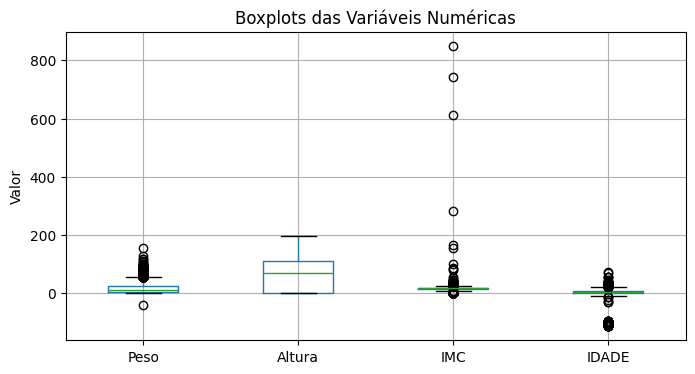

In [24]:
colunas_numericas = ['Peso', 'Altura', 'IMC', 'IDADE', 'PULSOS']
df[colunas_numericas].boxplot(figsize=(8, 4))
plt.title('Boxplots das Variáveis Numéricas')
plt.ylabel('Valor')
plt.show()


Idade

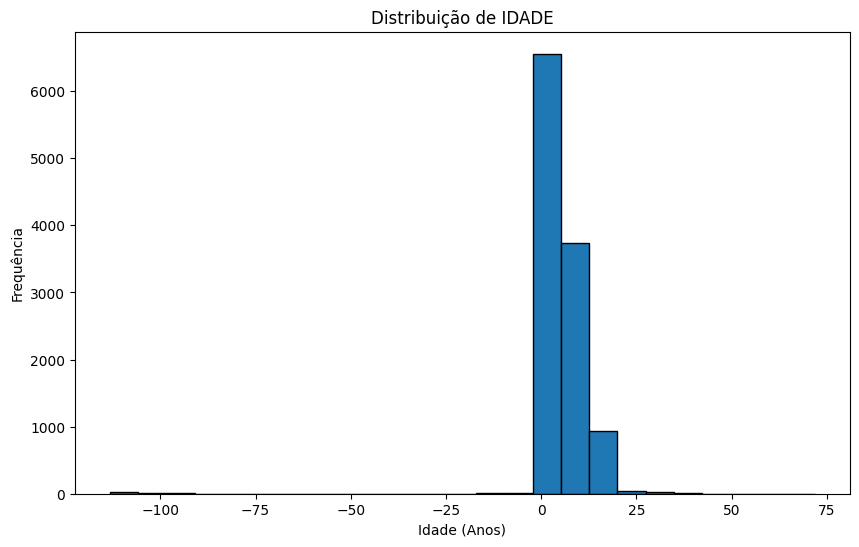

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['IDADE'], bins=25, edgecolor='black')
plt.title('Distribuição de IDADE')
plt.xlabel('Idade (Anos)')
plt.ylabel('Frequência')
plt.show()

In [55]:
dez_maiores_idades = df.nlargest(10, 'IDADE')
dez_menores_idades = df.nsmallest(10, 'IDADE')

print(dez_maiores_idades [['ID', 'IDADE']])
print(dez_menores_idades [['ID', 'IDADE']])

          ID  IDADE
10294  14710  71.81
9004   12847  70.61
11291  15995  55.07
1913    2804  54.76
11239  15920  54.66
11182  15840  46.61
5723    8253  42.83
9227   13176  40.44
9600   13695  39.12
8003   11451  38.99
          ID   IDADE
11782  16731 -113.18
8490   12116 -113.11
9405   13428 -112.99
5103    7405 -112.52
1905    2790 -112.46
10583  15097 -112.46
5999    8641 -112.13
823     1214 -112.09
11078  15709 -111.60
11729  16652 -111.47


Variáveis categóricas

In [48]:
print("\n### Contagem de Valores da variável NORMAL X ANORMAL ###")
print(df['NORMAL X ANORMAL'].value_counts(dropna=False))

print("\n### Contagem de Valores da variável SEXO ###")
print(df['SEXO'].value_counts(dropna=False))


### Contagem de Valores da variável NORMAL X ANORMAL ###
NORMAL X ANORMAL
Normal     6744
Anormal    4959
NaN        1168
anormal       1
Normais       1
Name: count, dtype: int64

### Contagem de Valores da variável SEXO ###
SEXO
M                6065
F                4477
Indeterminado    1417
Masculino         584
Feminino          247
masculino          79
NaN                 4
Name: count, dtype: int64


# Análise Qualitativa

Aqui analisamos valores ausentes e dados insconsistentes. Pode ocorrer tratamentos imediatos se o erro for óbvio e de alto impacto

In [ ]:
# Valores Ausentes
print("\n### Valores Ausentes por Coluna ###")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 

# Peso
print("\n### Inconsistências em Peso: ###")

# A) Pesos Negativos
dados_negativos = df[df['Peso'] < 0]
print(f"Linhas com peso negativo (antes da correção): {len(dados_negativos)}")

# B) Pesos zerados
contagem_zeros = (df['Peso'] == 0).sum()
print(f"O número de pesos iguais a zero é: {contagem_zeros}")



############################################

# Idade
print("\n### Inconsistências em Idade: ###")

# A) Idades Negativas
dados_negativos = df[df['IDADE'] < 0]
print(f"Linhas com idade negativa (antes da correção): {len(dados_negativos)}")






### Valores Ausentes por Coluna ###
Peso                  318
IMC                  4727
Atendimento           983
DN                   1376
IDADE                1496
Convenio             4108
PULSOS               1194
PA SISTOLICA         7730
PA DIASTOLICA        7740
PPA                   217
NORMAL X ANORMAL     1168
B2                   1178
SOPRO                1167
FC                   1868
HDA 1                4270
HDA2                12466
SEXO                    4
MOTIVO1              1055
MOTIVO2              3496
dtype: int64

### Inconsistências em Peso: ###
Linhas com peso negativo (antes da correção): 1
O número de pesos iguais a zero é: 2609

### Inconsistências em Idade: ###
Linhas com idade negativa (antes da correção): 122


In [67]:
#Correção

df['Peso'] = df['Peso'].abs() # Correção
print("Menor peso após a correção:", df['Peso'].min())

df['IDADE'] = df['IDADE'].abs() # Correção
print("Menor idade após a correção:", df['IDADE'].min())

Menor peso após a correção: 0.0
Menor idade após a correção: 0.0


In [69]:
# Consistência de Variáveis Categóricas
print("\n### Verificação de Consistência Categórica (Ex: B2) ###")
print(df['B2'].value_counts(dropna=False))


### Verificação de Consistência Categórica (Ex: B2) ###
B2
Normal           11098
NaN               1178
Hiperfonética      295
Desdob fixo        149
Única               77
Outro               76
Name: count, dtype: int64
